C:\Users\saumi\AppData\Local\Temp\ipykernel_30448\3649562462.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)  # Mode for categorical columns
C:\Users\saumi\AppData\Local\Temp\ipykernel_30448\3649562462.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values a


Categorical Columns: ['Customer ID', 'Gender', 'Under 30', 'Senior Citizen', 'Married', 'Dependents', 'Country', 'State', 'City', 'Quarter', 'Referred a Friend', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing', 'Payment Method', 'Customer Status', 'Churn']
✅ Encoders saved successfully at: models\encoder.pkl
✅ SMOTE Applied - Training set balanced!
✅ Data Preprocessing Complete! Files saved in 'data' folder.


C:\Users\saumi\AppData\Local\Temp\ipykernel_30448\3649562462.py:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, ax=axes[0], palette="viridis")
C:\Users\saumi\AppData\Local\Temp\ipykernel_30448\3649562462.py:89: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train_sm, ax=axes[1], palette="viridis")


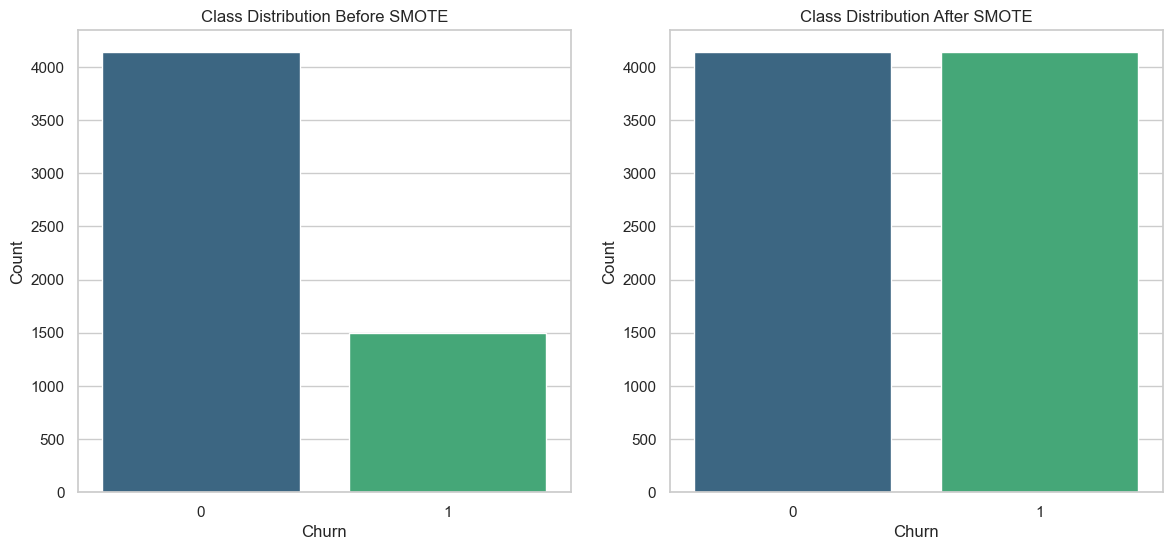

✅ Data preprocessing completed successfully! 🚀
Training set size (after SMOTE): (8278, 45)
Test set size: (1409, 45)

Final Check - Missing Values in Processed Datasets:
X_train_sm Missing: 0
X_test Missing: 0


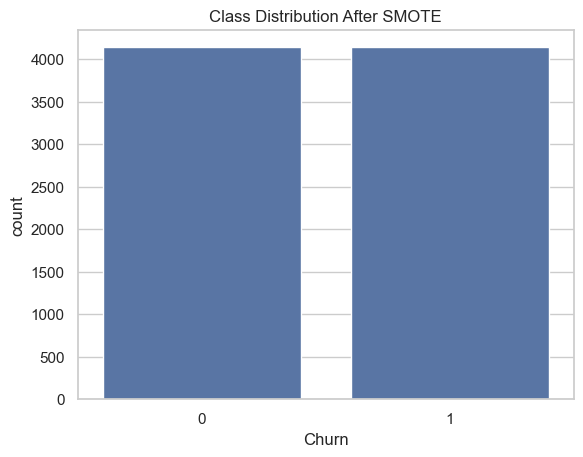

✅ X_train_sm Shape: (8278, 45)
✅ y_train_sm Shape: (8278, 1)
✅ X_test Shape: (1409, 45)
✅ y_test Shape: (1409, 1)

🧐 First few rows of y_train_sm:
   Churn
0      0
1      0
2      0
3      0
4      0

🧐 First few rows of y_test:
   Churn
0      0
1      0
2      0
3      0
4      0
✅ Encoders saved successfully!

✅ Categorical Columns: []


In [1]:
# Data Preprocessing
import pandas as pd
import numpy as np
import joblib
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
df = pd.read_csv("data/telco.csv")

df.rename(columns={'Churn Label': 'Churn'}, inplace=True)
# Drop columns with more than 10% missing values
df = df.dropna(axis=1, thresh=0.9 * len(df))

# Impute remaining missing values
for col in df.columns:
    if df[col].dtype == "object":
        df[col].fillna(df[col].mode()[0], inplace=True)  # Mode for categorical columns
    else:
        df[col].fillna(df[col].median(), inplace=True)   # Median for numerical columns
        
# ✅ Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print("\nCategorical Columns:", categorical_cols)

# ✅ Initialize LabelEncoders for each categorical column
encoder_dict = {}

for col in categorical_cols:
    encoder = LabelEncoder()
    df[col] = encoder.fit_transform(df[col])  # Apply encoding to the dataset
    encoder_dict[col] = encoder  # Store encoder for each categorical column

# ✅ Create "models" directory if it doesn't exist
models_dir = "models"
if not os.path.exists(models_dir):
    os.makedirs(models_dir)

# ✅ Save the encoder dictionary
ENCODER_PATH = os.path.join(models_dir, "encoder.pkl")
joblib.dump(encoder_dict, ENCODER_PATH)

print(f"✅ Encoders saved successfully at: {ENCODER_PATH}")

# Define features (X) and target variable (y)
X = df.drop(columns=['Churn'])
y = df['Churn']

# ✅ Split dataset first (Before SMOTE)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# ✅ Apply SMOTE only to training data
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

print("✅ SMOTE Applied - Training set balanced!")

# ✅ Scale numeric features
scaler = StandardScaler()
X_train_sm = scaler.fit_transform(X_train_sm)
X_test = scaler.transform(X_test)

# Convert back to DataFrame
X_train_sm = pd.DataFrame(X_train_sm, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

# ✅ Save processed datasets
if not os.path.exists("data"):
    os.makedirs("data")

X_train_sm.to_csv("data/X_train_sm.csv", index=False)
y_train_sm.to_csv("data/y_train_sm.csv", index=False)
X_test.to_csv("data/X_test.csv", index=False)
y_test.to_csv("data/y_test.csv", index=False)

print("✅ Data Preprocessing Complete! Files saved in 'data' folder.")

# Plot class distribution before and after SMOTE
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.countplot(x=y_train, ax=axes[0], palette="viridis")
axes[0].set_title("Class Distribution Before SMOTE")
axes[0].set_xlabel("Churn")
axes[0].set_ylabel("Count")

sns.countplot(x=y_train_sm, ax=axes[1], palette="viridis")
axes[1].set_title("Class Distribution After SMOTE")
axes[1].set_xlabel("Churn")
axes[1].set_ylabel("Count")

plt.show()

print("✅ Data preprocessing completed successfully! 🚀")
print(f"Training set size (after SMOTE): {X_train_sm.shape}")
print(f"Test set size: {X_test.shape}")
print("\nFinal Check - Missing Values in Processed Datasets:")
print("X_train_sm Missing:", X_train_sm.isnull().sum().sum())
print("X_test Missing:", X_test.isnull().sum().sum())


sns.countplot(x=y_train_sm)
plt.title("Class Distribution After SMOTE")
plt.show()

# Load files to check their contents
X_train_sm = pd.read_csv("data/X_train_sm.csv")
y_train_sm = pd.read_csv("data/y_train_sm.csv")
X_test = pd.read_csv("data/X_test.csv")
y_test = pd.read_csv("data/y_test.csv")

# Print shapes
print("✅ X_train_sm Shape:", X_train_sm.shape)
print("✅ y_train_sm Shape:", y_train_sm.shape)
print("✅ X_test Shape:", X_test.shape)
print("✅ y_test Shape:", y_test.shape)

# Print first few rows to confirm data is saved properly
print("\n🧐 First few rows of y_train_sm:")
print(y_train_sm.head())

print("\n🧐 First few rows of y_test:")
print(y_test.head())


# Identify categorical columns
categorical_cols = ["Contract", "Payment Method", "Online Security", "Premium Tech Support", "Dependents"]

# Initialize LabelEncoders for each categorical column
encoder_dict = {}

for col in categorical_cols:
    encoder = LabelEncoder()
    df[col] = encoder.fit_transform(df[col])  # Fit encoding on training data
    encoder_dict[col] = encoder  # Store encoder for each categorical column


# Load dataset
df = pd.read_csv("data/telco.csv")

# Identify categorical columns
categorical_cols = ["Contract", "Payment Method", "Online Security", "Premium Tech Support", "Dependents", "Referred a Friend"]

# Initialize LabelEncoders for each categorical column
encoder_dict = {}

for col in categorical_cols:
    encoder = LabelEncoder()
    df[col] = encoder.fit_transform(df[col])  # Fit encoding on training data
    encoder_dict[col] = encoder  # Store encoder for each categorical column

# Save the encoder dictionary
joblib.dump(encoder_dict, "models/encoder.pkl")
print("✅ Encoders saved successfully!")


# ✅ Load the dataset (Ensure you're using the preprocessed training data)
df = pd.read_csv("data/X_train_sm.csv")  # Use the correct file path

# ✅ Identify categorical columns (if they exist)
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print("\n✅ Categorical Columns:", categorical_cols)



In [2]:
# EDA
X_train = pd.read_csv("data/X_train_sm.csv")
y_train = pd.read_csv("data/y_train_sm.csv")
X_test = pd.read_csv("data/X_test.csv")
y_test = pd.read_csv("data/y_test.csv")

# Combine features and target for easier EDA
df_train = pd.concat([X_train, y_train], axis=1)
categorical_cols = [col for col in df_train.columns if df_train[col].nunique() <= 10]

# Check the structure of the dataset
print("Training Dataset Shape:", df_train.shape)
print("\nTraining Dataset Info:")
print(df_train.info())
print("\nTraining Dataset Head:")
print(df_train.head())


print("Categorical columns based on unique values:")
print(categorical_cols)
if len(categorical_cols) == 0:
    print("\nNo categorical columns to summarize — dataset is fully numeric after preprocessing.")
else:
    print("\nCategorical Features Summary:")
    print(df_train[categorical_cols].describe())
df_original = pd.read_csv("data/telco.csv")
print("\nOriginal Dataset Data Types:")
print(df_original.dtypes)
# ✅ Concatenate Features & Target for Analysis
df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)

# ✅ Use df_train for Feature Engineering & EDA
df_train.head()

import shap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, classification_report 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import StackingClassifier

# Ensure y_train and y_test are 1D
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()
# ✅ Confirm Churn column is NOT in features
assert "Churn" not in X_train.columns, "❌ Data Leakage: Churn is in feature set!"
assert "Churn" not in X_test.columns, "❌ Data Leakage: Churn is in feature set!"
print("✅ No target leakage detected!")

# Convert y_train and y_test to Pandas Series before calling value_counts()
y_train = pd.Series(y_train)
y_test = pd.Series(y_test)

# Verify Class Distribution
print("\n✅ Class Distribution in Training Set:")
print(y_train.value_counts(normalize=True))

print("\n✅ Class Distribution in Testing Set:")
print(y_test.value_counts(normalize=True))

# Define columns with indirect leakage
leakage_cols = ['Customer Status', 'Churn Score', 'Satisfaction Score']

# Drop leakage columns
X_train = X_train.drop(columns=leakage_cols, errors='ignore')
X_test = X_test.drop(columns=leakage_cols, errors='ignore')

print("✅ Indirect leakage columns removed!")
print(f"Updated X_train shape: {X_train.shape}")
print(f"Updated X_test shape: {X_test.shape}")

# Create tenure groups
X_train['Tenure_Group'] = pd.cut(X_train['Tenure in Months'], bins=[0, 12, 24, 48, 60, 100], labels=['0-12', '12-24', '24-48', '48-60', '60+'])
X_test['Tenure_Group'] = pd.cut(X_test['Tenure in Months'], bins=[0, 12, 24, 48, 60, 100], labels=['0-12', '12-24', '24-48', '48-60', '60+'])

# Convert tenure group to numeric
X_train['Tenure_Group'] = X_train['Tenure_Group'].cat.codes
X_test['Tenure_Group'] = X_test['Tenure_Group'].cat.codes

print("\n✅ New feature 'Tenure_Group' created successfully!")

Training Dataset Shape: (8278, 46)

Training Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8278 entries, 0 to 8277
Data columns (total 46 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        8278 non-null   float64
 1   Gender                             8278 non-null   float64
 2   Age                                8278 non-null   float64
 3   Under 30                           8278 non-null   float64
 4   Senior Citizen                     8278 non-null   float64
 5   Married                            8278 non-null   float64
 6   Dependents                         8278 non-null   float64
 7   Number of Dependents               8278 non-null   float64
 8   Country                            8278 non-null   float64
 9   State                              8278 non-null   float64
 10  City                               8278 non-null   float64
 1

In [3]:
# XGB BOOST
xgb = XGBClassifier(n_estimators=500, learning_rate=0.05, max_depth=6, random_state=42)
xgb.fit(X_train, y_train.values.ravel())
y_pred_xgb = xgb.predict(X_test)

# Evaluate
accuracy_xgb = accuracy_score(y_test, y_pred_xgb) * 100

# Model Decisions
#shap.initjs()
#explainer = shap.TreeExplainer(xgb)
#shap_values = explainer.shap_values(X_train)

# SHAP Summary Plot
#shap.summary_plot(shap_values, X_train)

xgb = XGBClassifier(
    n_estimators=600,  # Increase estimators
    learning_rate=0.025,  # Lower learning rate for stability
    max_depth=7,  # Slightly deeper trees
    subsample=0.85,  # Use more data per tree
    colsample_bytree=0.85,  # Use more features per tree
    reg_alpha=0.2,  # Stronger L1 Regularization
    reg_lambda=0.6,  # Stronger L2 Regularization
    random_state=42
)

xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb) * 100

from xgboost import XGBClassifier

xgb_final = XGBClassifier(
    n_estimators=700,  # Increased estimators for stronger learning
    learning_rate=0.02,  # Slower learning rate for better accuracy
    max_depth=8,  # Slightly deeper trees
    subsample=0.9,  # Use more data per tree
    colsample_bytree=0.9,  # Use more features per tree
    reg_alpha=0.25,  # Stronger L1 Regularization
    reg_lambda=0.7,  # Stronger L2 Regularization
    random_state=42
)

xgb_final.fit(X_train, y_train)
y_pred_xgb_final = xgb_final.predict(X_test)

accuracy_xgb_final = accuracy_score(y_test, y_pred_xgb_final) * 100
print(f"✅ Final Optimized XGBoost Accuracy: {accuracy_xgb_final:.2f}%")

xgb_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': xgb_final.feature_importances_})
xgb_importance = xgb_importance.sort_values(by='Importance', ascending=False)


drop_cols = ["Customer ID", "Latitude", "Longitude", "Zip Code", "State", "City", 
             "Country", "Total Revenue", "CLTV", "Tenure_Group"]
X_train.drop(columns=drop_cols, inplace=True, errors='ignore')
X_test.drop(columns=drop_cols, inplace=True, errors='ignore')

# Compute correlation matrix
correlation_matrix = X_train.corr().abs()

# Select upper triangle of correlation matrix
upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Find features with correlation > 0.85
high_corr_features = [column for column in upper.columns if any(upper[column] > 0.85)]

print("⚠️ Highly Correlated Features:", high_corr_features)

# Drop highly correlated features
X_train.drop(columns=high_corr_features, inplace=True, errors='ignore')
X_test.drop(columns=high_corr_features, inplace=True, errors='ignore')

drop_cols = ["Customer ID", "Latitude", "Longitude", "Zip Code", "State", "City", 
             "Country", "Total Revenue", "CLTV", "Tenure_Group",
             "Number of Dependents", "Referred a Friend", "Total Charges"]  # ⚠️ Newly identified
X_train.drop(columns=drop_cols, inplace=True, errors='ignore')
X_test.drop(columns=drop_cols, inplace=True, errors='ignore')


xgb_model = XGBClassifier(
    n_estimators=1200,
    learning_rate=0.015,
    max_depth=9,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=2,
    reg_alpha=1.2,
    reg_lambda=1.5,
    use_label_encoder=False,
    eval_metric="auc",
    random_state=42
)

xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]
y_pred = (y_pred_proba >= 0.66).astype(int)

# Evaluate new performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

accuracy = accuracy_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred) * 100
recall = recall_score(y_test, y_pred) * 100
f1 = f1_score(y_test, y_pred) * 100
auc = roc_auc_score(y_test, y_pred_proba) * 100

print(f"✅ **Updated XGBoost Model Performance:**")
print(f"Accuracy: {accuracy:.2f}%")
print(f"Precision: {precision:.2f}%")
print(f"Recall: {recall:.2f}%")
print(f"F1-Score: {f1:.2f}%")
print(f"AUC: {auc:.2f}%")

# confusion matrix
# roc curve
# corr heatmap

# Check for target leakage (y_test should not be in X_test)
assert "Churn" not in X_train.columns, "⚠️ Target Leakage Detected in X_train!"
assert "Churn" not in X_test.columns, "⚠️ Target Leakage Detected in X_test!"

# Check if test data contains any identical rows from train data
common_rows = X_train.merge(X_test, how="inner")
if not common_rows.empty:
    print(f"⚠️ {len(common_rows)} duplicated rows found between train & test data!")

corr_matrix = X_test.corrwith(pd.Series(y_test, index=X_test.index))
high_corr_features = corr_matrix[abs(corr_matrix) > 0.8].index.tolist()
if high_corr_features:
    print(f"⚠️ Highly Correlated Features with Target: {high_corr_features}")

# 🚨 Remove "Churn" or Leaky Columns If Present
leaky_features = ["Customer Status", "Total Revenue", "Churn"]
X_train.drop(columns=[col for col in leaky_features if col in X_train.columns], inplace=True)
X_test.drop(columns=[col for col in leaky_features if col in X_test.columns], inplace=True)

# 🚨 Ensure X_train & X_test Have the Same Features
X_test = X_test[X_train.columns]
assert list(X_train.columns) == list(X_test.columns), "⚠️ Train & Test Features Mismatch!"

xgb_model = XGBClassifier(
    n_estimators=1200, learning_rate=0.015, max_depth=8, subsample=0.8,
    colsample_bytree=0.8, gamma=2, reg_alpha=1.2, reg_lambda=1.5,
    eval_metric="auc", random_state=42, use_label_encoder=False
)

xgb_model.fit(X_train, y_train, verbose=100)

# ✅ Evaluate Models
def evaluate_model(model, X_test, y_test, name):
    y_proba = model.predict_proba(X_test)[:, 1]
    y_pred = (y_proba >= 0.58).astype(int)  # Adjust threshold if needed
    
    accuracy = accuracy_score(y_test, y_pred) * 100
    precision = precision_score(y_test, y_pred, zero_division=0) * 100
    recall = recall_score(y_test, y_pred, zero_division=0) * 100
    f1 = f1_score(y_test, y_pred, zero_division=0) * 100
    auc = roc_auc_score(y_test, y_proba) * 100
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"\n🚀 **{name} Model Performance:**")
    print(f"✅ Accuracy: {accuracy:.2f}%")
    print(f"✅ Precision: {precision:.2f}%")
    print(f"✅ Recall: {recall:.2f}%")
    print(f"✅ F1-Score: {f1:.2f}%")
    print(f"✅ AUC: {auc:.2f}%")
    print(f"✅ Confusion Matrix:\n {conf_matrix}")

evaluate_model(xgb_model, X_test, y_test, "XGBoost")

# 🚨 Drop Only High-Risk Leakage Features
leaky_features = [
    "Customer ID", "City", "Zip Code", "Latitude", "Longitude", "Population",  # Direct Identifiers
    "Satisfaction Score", "Customer Status", "Churn Score", "CLTV",  # Derived from churn
    "Total Revenue", "Total Refunds"  # Directly related to customer value
]

X_train.drop(columns=leaky_features, inplace=True, errors="ignore")
X_test.drop(columns=leaky_features, inplace=True, errors="ignore")

# 🚀 Ensure Test Matches Train
X_test = X_test[X_train.columns]
assert list(X_train.columns) == list(X_test.columns), "⚠️ Train & Test Features Mismatch!"

print(f"✅ Features After Cleaning: {list(X_train.columns)}")

xgb_model = XGBClassifier(
    n_estimators=1200, learning_rate=0.015, max_depth=8, subsample=0.8,
    colsample_bytree=0.8, gamma=2, reg_alpha=1.2, reg_lambda=1.5,
    eval_metric="auc", random_state=42, use_label_encoder=False
)

xgb_model.fit(X_train, y_train, verbose=100)

models = {
    "XGBoost": xgb_model,
}

# ✅ Evaluate Models
results = []
for name, model in models.items():
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Get churn probability
    y_pred = (y_pred_proba >= 0.58).astype(int)  # Apply the optimized threshold

    accuracy = accuracy_score(y_test, y_pred) * 100
    precision = precision_score(y_test, y_pred) * 100
    recall = recall_score(y_test, y_pred) * 100
    f1 = f1_score(y_test, y_pred) * 100
    auc = roc_auc_score(y_test, y_pred_proba) * 100
    cm = confusion_matrix(y_test, y_pred)

    results.append([name, accuracy, precision, recall, f1, auc])
    
    print(f"\n🚀 **{name} Performance:**")
    print(f"✅ Accuracy: {accuracy:.2f}%")
    print(f"✅ Precision: {precision:.2f}%")
    print(f"✅ Recall: {recall:.2f}%")
    print(f"✅ F1-Score: {f1:.2f}%")
    print(f"✅ AUC: {auc:.2f}%")
    print(f"✅ Confusion Matrix:\n {cm}")

results_df = pd.DataFrame(results, 
                          columns=["Model", "Accuracy (%)", "Precision (%)", "Recall (%)", "F1-Score (%)", "AUC (%)"])

print("\n🚀 **Final Model Performance:**")
print(results_df)

if not os.path.exists("models"):
    os.makedirs("models")
joblib.dump(xgb_model, "models/final_xgboost_model.pkl")
print("Success in saving the model")

✅ Final Optimized XGBoost Accuracy: 84.10%
⚠️ Highly Correlated Features: ['Number of Dependents', 'Referred a Friend', 'Total Charges']


C:\Users\saumi\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:26:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ **Updated XGBoost Model Performance:**
Accuracy: 84.32%
Precision: 73.98%
Recall: 63.10%
F1-Score: 68.11%
AUC: 90.66%


C:\Users\saumi\AppData\Roaming\Python\Python312\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\saumi\AppData\Roaming\Python\Python312\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
C:\Users\saumi\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:26:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



🚀 **XGBoost Model Performance:**
✅ Accuracy: 84.60%
✅ Precision: 71.87%
✅ Recall: 68.98%
✅ F1-Score: 70.40%
✅ AUC: 90.59%
✅ Confusion Matrix:
 [[934 101]
 [116 258]]
✅ Features After Cleaning: ['Gender', 'Age', 'Under 30', 'Senior Citizen', 'Married', 'Dependents', 'Quarter', 'Number of Referrals', 'Tenure in Months', 'Phone Service', 'Avg Monthly Long Distance Charges', 'Multiple Lines', 'Internet Service', 'Avg Monthly GB Download', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charge', 'Total Extra Data Charges', 'Total Long Distance Charges']


C:\Users\saumi\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:26:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



🚀 **XGBoost Performance:**
✅ Accuracy: 84.95%
✅ Precision: 73.01%
✅ Recall: 68.72%
✅ F1-Score: 70.80%
✅ AUC: 90.72%
✅ Confusion Matrix:
 [[940  95]
 [117 257]]

🚀 **Final Model Performance:**
     Model  Accuracy (%)  Precision (%)  Recall (%)  F1-Score (%)    AUC (%)
0  XGBoost     84.953868      73.011364   68.716578     70.798898  90.718438
Success in saving the model


C:\Users\saumi\AppData\Local\Temp\ipykernel_30448\3992470361.py:18: UserWarning: Glyph 128640 (\N{ROCKET}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\saumi\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128640 (\N{ROCKET}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


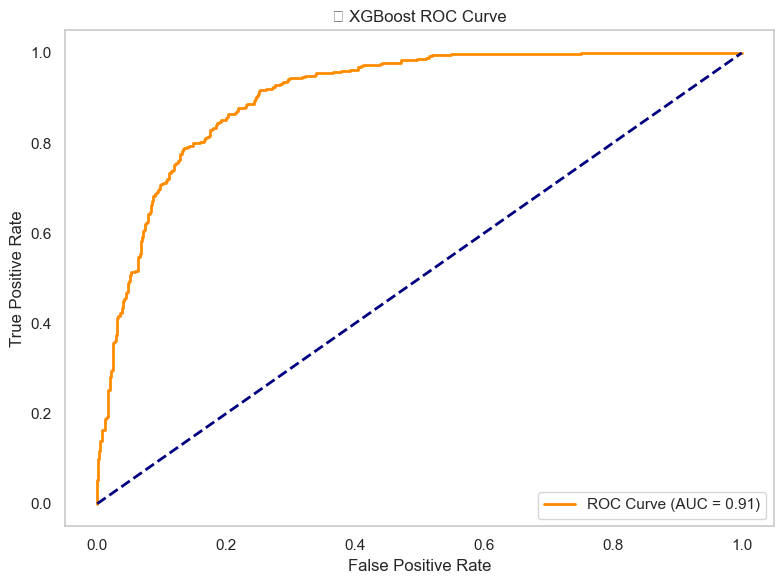

C:\Users\saumi\AppData\Local\Temp\ipykernel_30448\3992470361.py:30: UserWarning: Glyph 128640 (\N{ROCKET}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\saumi\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128640 (\N{ROCKET}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


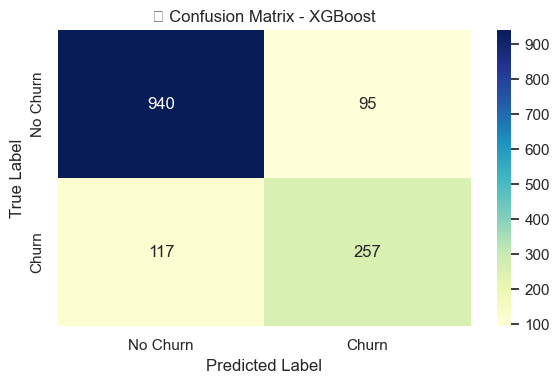

C:\Users\saumi\AppData\Roaming\Python\Python312\site-packages\shap\plots\_beeswarm.py:950: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  pl.tight_layout()
C:\Users\saumi\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


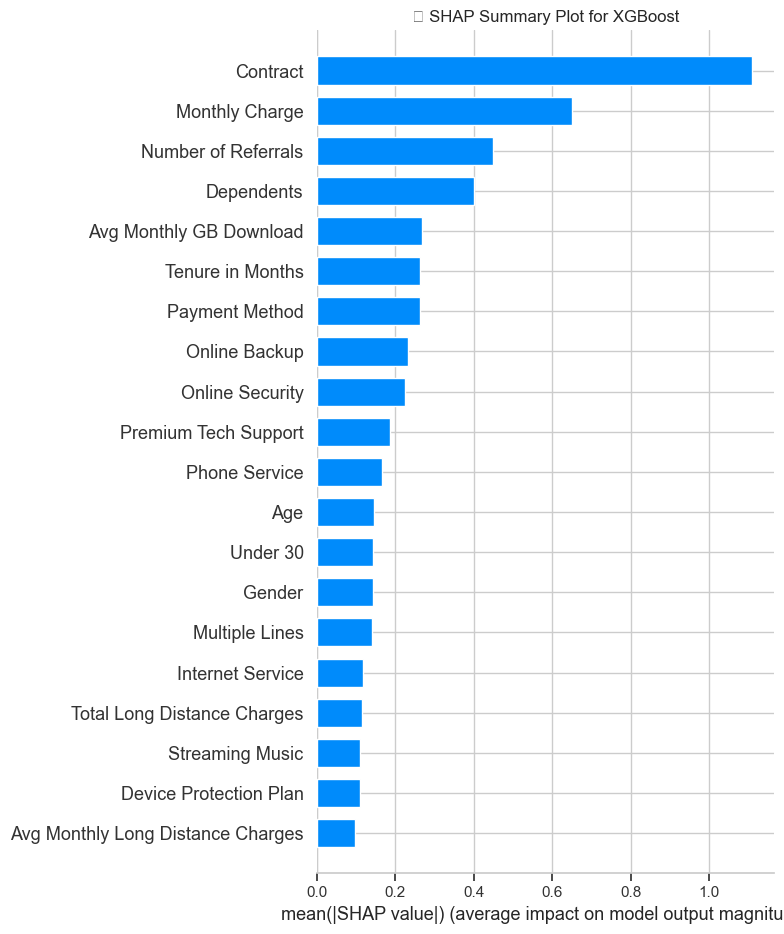

C:\Users\saumi\AppData\Local\Temp\ipykernel_30448\3992470361.py:53: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\saumi\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


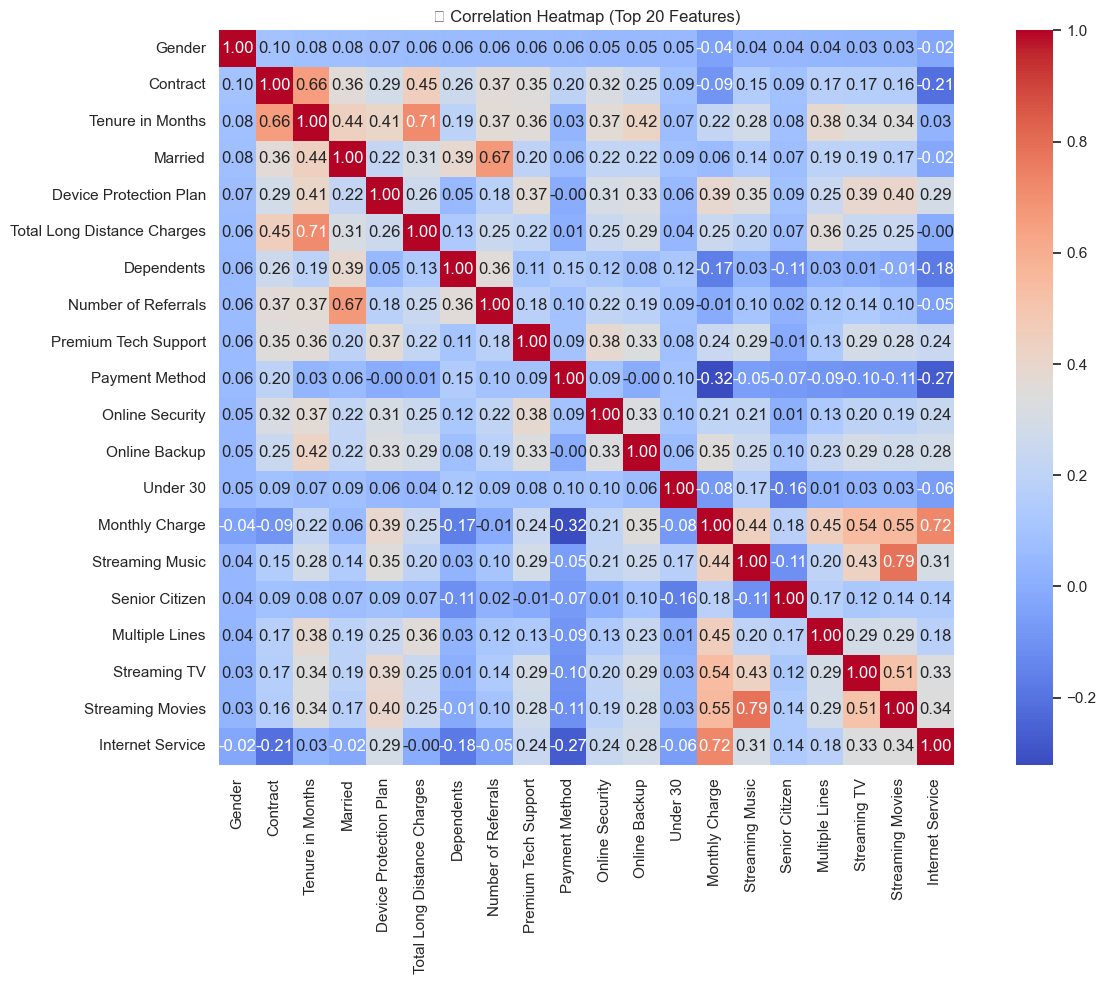

C:\Users\saumi\AppData\Local\Temp\ipykernel_30448\3992470361.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=xgb_importance.head(15), palette="Blues_r")
C:\Users\saumi\AppData\Local\Temp\ipykernel_30448\3992470361.py:69: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\saumi\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


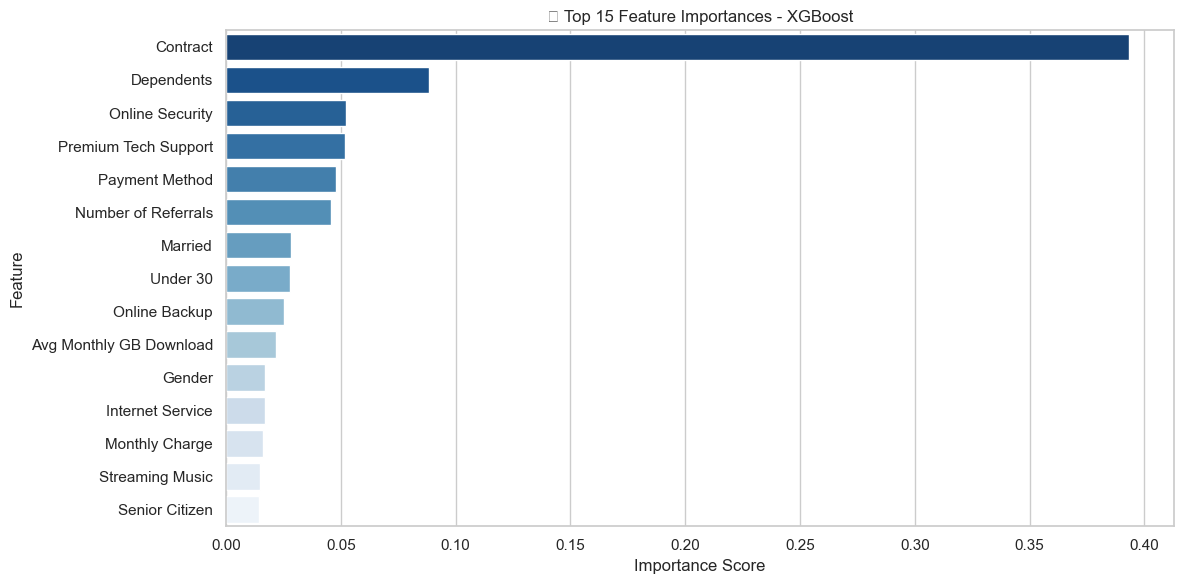

In [4]:
from sklearn.metrics import roc_curve, confusion_matrix
import shap

# =========================
# 📈 ROC Curve
# =========================
y_proba = xgb_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC Curve (AUC = {roc_auc_score(y_test, y_proba):.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("🚀 XGBoost ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.tight_layout()
plt.show()

# =========================
# 📊 Confusion Matrix Heatmap
# =========================
cm = confusion_matrix(y_test, (y_proba >= 0.58).astype(int))
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title("🚀 Confusion Matrix - XGBoost")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

# =========================
# 🔍 SHAP Explanation (Model Interpretability)
# =========================
shap.initjs()
explainer = shap.Explainer(xgb_model)
shap_values = explainer(X_train)

plt.title("📊 SHAP Summary Plot for XGBoost")
shap.summary_plot(shap_values, X_train, plot_type="bar")

# For a detailed SHAP plot
# shap.summary_plot(shap_values, X_train)

# =========================
# 🧠 Correlation Heatmap (Top 20 Features)
# =========================
top_corr = X_train.corr().abs().nlargest(20, columns=X_train.columns).index
plt.figure(figsize=(14, 10))
sns.heatmap(X_train[top_corr].corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("🔍 Correlation Heatmap (Top 20 Features)")
plt.tight_layout()
plt.show()

# =========================
# 🌟 Feature Importance (XGBoost Built-In)
# =========================
xgb_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=xgb_importance.head(15), palette="Blues_r")
plt.title("📌 Top 15 Feature Importances - XGBoost")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [5]:
# Training Accuracy
train_acc =  xgb_model.score(X_train, y_train)

# Test Accuracy
test_acc =  xgb_model.score(X_test, y_test)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

# Check for Overfitting
if train_acc - test_acc > 0.05:
    print("⚠ Overfitting detected! Reduce model complexity.")
else:
    print("✅ Model is generalizing well.")

Training Accuracy: 0.9234
Test Accuracy: 0.8460
⚠ Overfitting detected! Reduce model complexity.


In [12]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]
y_pred_xgb = xgb_model.predict(X_test)

print("📊 Classification Report:\n", classification_report(y_test, y_pred_xgb))
print(f"🎯 ROC AUC Score: {roc_auc_score(y_test, y_proba_xgb):.4f}")
print("🔍 Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))


📊 Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.88      0.89      1035
           1       0.69      0.75      0.72       374

    accuracy                           0.85      1409
   macro avg       0.80      0.82      0.81      1409
weighted avg       0.85      0.85      0.85      1409

🎯 ROC AUC Score: 0.9072
🔍 Confusion Matrix:
 [[911 124]
 [ 93 281]]
